In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

Goal: Predict the type of cuisine based on given ingredients

In [3]:
test_data = pd.read_json("../Cooking_Assets/test.json")
train_data = pd.read_json("../Cooking_Assets/train.json")

test_df = pd.DataFrame(test_data)
train_df=pd.DataFrame(train_data)


In [4]:
train_df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [5]:

ingredients = train_df.groupby("ingredients")
cuisineCount = train_df["cuisine"].value_counts()

#ingredientCount = train_df["ingredients"].value_counts()

Finding out the most common cuisine from the dataset

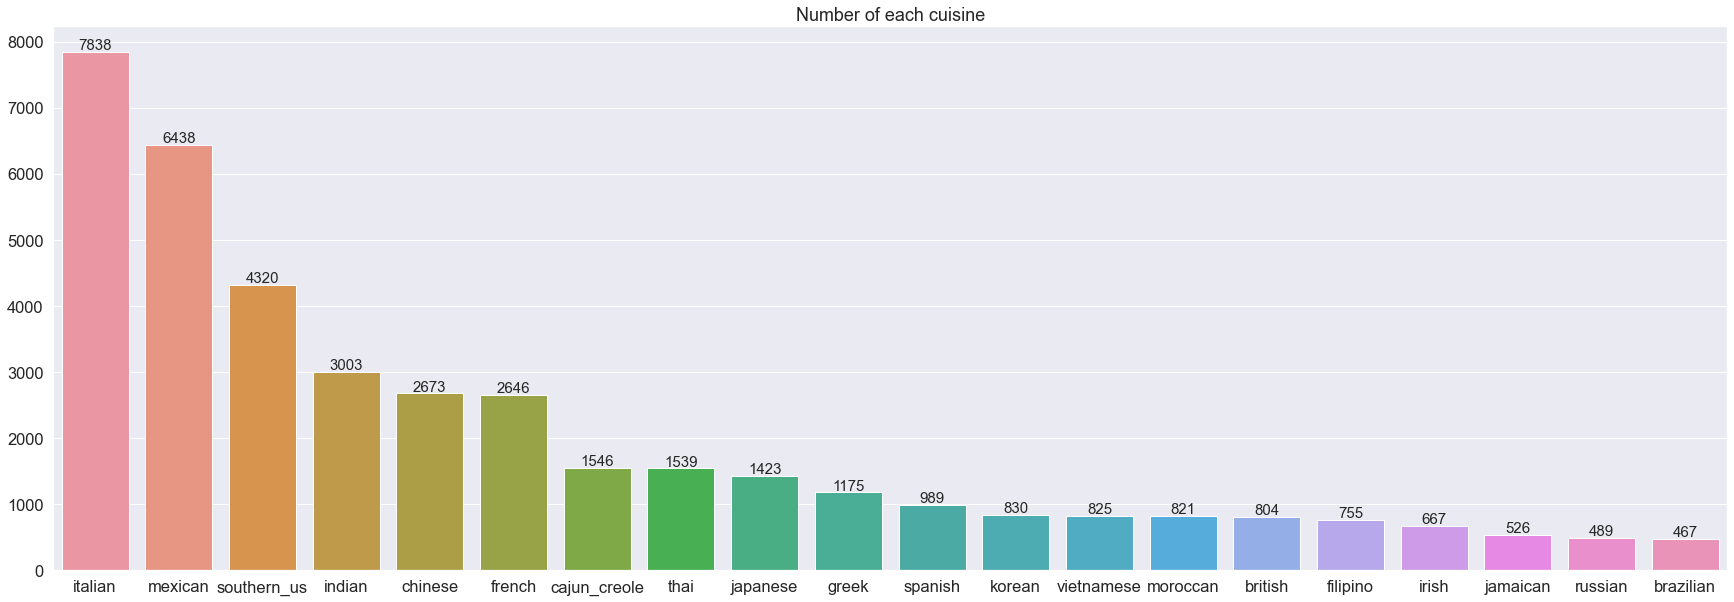

In [6]:
from matplotlib.font_manager import font_scalings


sb.set(font_scale=1.5)

figure, ax = plt.subplots(figsize = (30,10))
sb.barplot(data=train_df, x=cuisineCount.index ,y=cuisineCount.values,ax=ax)
plt.title("Number of each cuisine")


for plot in ax.patches:
    height, width, x = plot.get_height(), plot.get_width(), plot.get_x()
    xy = (x + width / 2., height + 100 )
    text = f'{height:0.0f}'
    ax.annotate(text=text, xy=xy, ha='center', va='center', fontsize= 15)



Finding out the most common ingredient

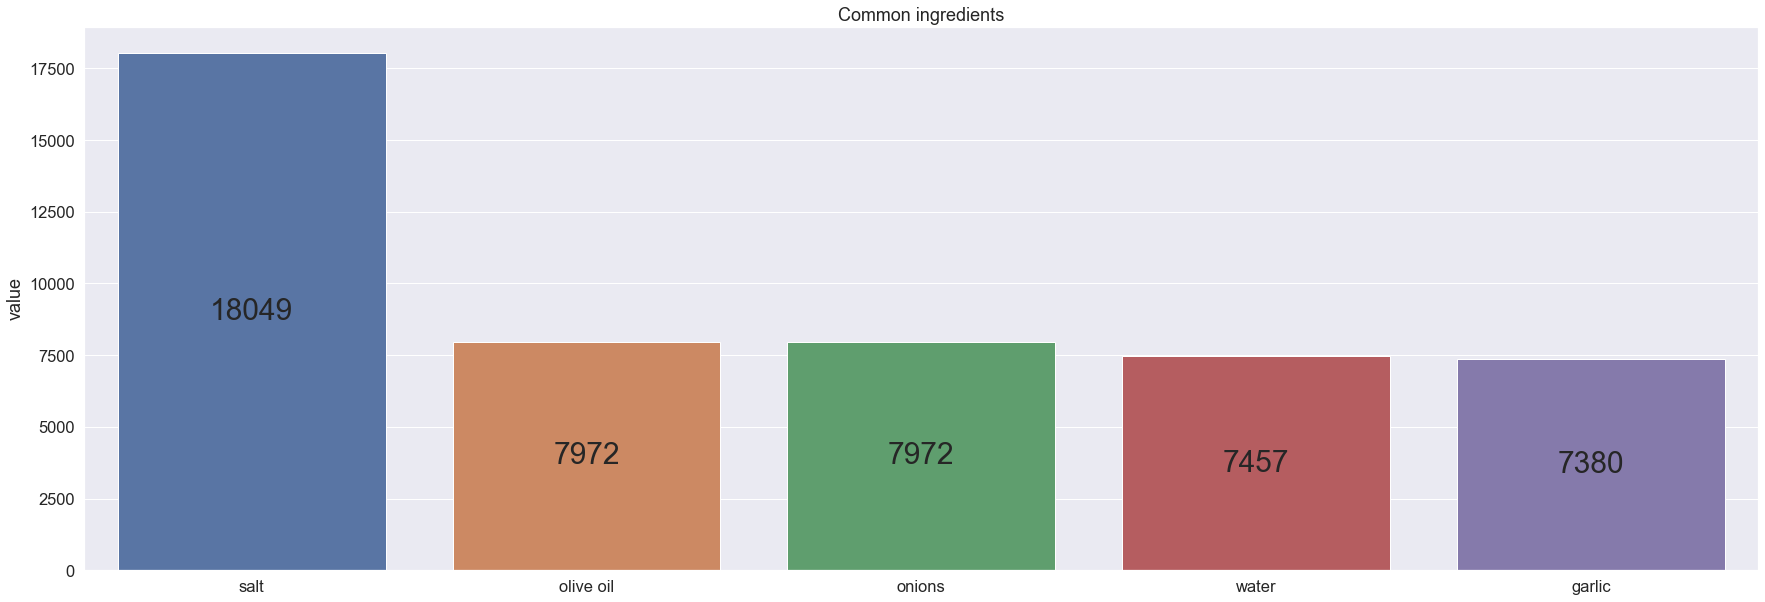

In [45]:


from sqlalchemy import true


ingredients = []
for ingredientArray in train_df["ingredients"]:
    for ingredient in ingredientArray:
        ingredients.append(ingredient)



# ingredient_df = pd.DataFrame()

# for ingredient in ingredients:
#     if(ingredient in ingredient_df):
#         ingredient_df[ingredient] += 1
#     else:
#         ingredient_df.assign(ingredient=[1])
ingredientCount_df = pd.Series(ingredients).value_counts().to_frame().head(5)
ingredientCount_df.rename(columns={0:'value'}, inplace=true)
figure2, ax2 = plt.subplots(figsize = (30,10))
sb.barplot(data = ingredientCount_df,x=ingredientCount_df.index,y='value',ax=ax2)
plt.title("Common ingredients")  

for plot in ax2.patches:
    height, width, x = plot.get_height(), plot.get_width(), plot.get_x()
    xy = (x + width / 2, height /2 )
    text = f'{height:0.0f}'
    ax2.annotate(text=text, xy=xy, ha='center', va='center', fontsize= 30)



In [37]:
ingredientCount_df


,value
salt,18049
olive oil,7972
onions,7972
water,7457
garlic,7380
sugar,6434
garlic cloves,6237
butter,4848
ground black pepper,4785
all-purpose flour,4632


Prediciting the cuisine from given ingredients